In [8]:
%pylab inline
%load_ext autoreload
%autoreload 2

from GPyOpt.methods import BayesianOptimization
import GPy
import GPyOpt
from numpy.random import seed
from tqdm import *

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


`%matplotlib` prevents importing * from pylab and numpy


In [92]:
from GPyOpt.objective_examples.experiments2d import function2d
class MyObj(function2d):
    '''
    Cosines function
    
    :param bounds: the box constraints to define the domain in which the function is optimized.
    :param sd: standard deviation, to generate noisy evaluations of the function.
    '''
    def __init__(self,bounds=None,sd=None):
        self.input_dim = 2
        if bounds == None: self.bounds = [(-100,100),(-100,100)]
        else: self.bounds = bounds
        self.min = [(0, 0)]
        self.fmin = 0
        if sd==None: self.sd = 0
        else: self.sd=sd
        self.name = 'Rosenbrock'

    def f(self,X):
#         X = reshape(X,self.input_dim)
        n = X.shape[0]
        if X.shape[1] != self.input_dim:
            return 'Wrong input dimension'
        else:
            fval = ((X[:,1]+X[:,0])>0)*2 - 1
            if self.sd ==0:
                noise = np.zeros(n).reshape(n,1)
            else:
                noise = np.random.normal(0,self.sd,n).reshape(n,1)
            return -fval.reshape(n,1) + noise


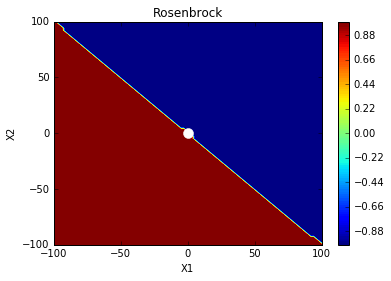

In [102]:
obj = MyObj()
myf = obj.f
obj.plot()

In [111]:
bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (-100,100)},
          {'name': 'var_2', 'type': 'continuous', 'domain': (-100,100)}]
max_iter =20

In [112]:
myProblem = BayesianOptimization(myf,bounds,acquisition_type="BinaryT")

  0%|          | 0/20 [00:00<?, ?it/s]

[[-74.22573986 -42.11822269]
 [-66.43765933  13.19216055]
 [ 72.91641077  53.17376681]
 [ 72.8265624  -29.68546998]
 [ 69.89459378 -14.44141541]
 [ 17.24594766 -95.2700368 ]]


  5%|▌         | 1/20 [00:01<00:19,  1.01s/it]

[[-74.22573986 -42.11822269]
 [-66.43765933  13.19216055]
 [ 72.91641077  53.17376681]
 [ 72.8265624  -29.68546998]
 [ 69.89459378 -14.44141541]
 [ 17.24594766 -95.2700368 ]
 [ 23.41696336  88.37086188]]


 10%|█         | 2/20 [00:02<00:19,  1.11s/it]

[[ -74.22573986  -42.11822269]
 [ -66.43765933   13.19216055]
 [  72.91641077   53.17376681]
 [  72.8265624   -29.68546998]
 [  69.89459378  -14.44141541]
 [  17.24594766  -95.2700368 ]
 [  23.41696336   88.37086188]
 [ -47.67846088  100.        ]]


 15%|█▌        | 3/20 [00:03<00:18,  1.11s/it]

[[ -74.22573986  -42.11822269]
 [ -66.43765933   13.19216055]
 [  72.91641077   53.17376681]
 [  72.8265624   -29.68546998]
 [  69.89459378  -14.44141541]
 [  17.24594766  -95.2700368 ]
 [  23.41696336   88.37086188]
 [ -47.67846088  100.        ]
 [  81.67427774  -97.54424149]]


 20%|██        | 4/20 [00:04<00:17,  1.07s/it]

[[ -74.22573986  -42.11822269]
 [ -66.43765933   13.19216055]
 [  72.91641077   53.17376681]
 [  72.8265624   -29.68546998]
 [  69.89459378  -14.44141541]
 [  17.24594766  -95.2700368 ]
 [  23.41696336   88.37086188]
 [ -47.67846088  100.        ]
 [  81.67427774  -97.54424149]
 [ -98.26250746   77.8469159 ]]


 25%|██▌       | 5/20 [00:05<00:16,  1.12s/it]

[[ -74.22573986  -42.11822269]
 [ -66.43765933   13.19216055]
 [  72.91641077   53.17376681]
 [  72.8265624   -29.68546998]
 [  69.89459378  -14.44141541]
 [  17.24594766  -95.2700368 ]
 [  23.41696336   88.37086188]
 [ -47.67846088  100.        ]
 [  81.67427774  -97.54424149]
 [ -98.26250746   77.8469159 ]
 [  -9.98616184  -10.21274069]]


 30%|███       | 6/20 [00:06<00:15,  1.11s/it]

[[ -74.22573986  -42.11822269]
 [ -66.43765933   13.19216055]
 [  72.91641077   53.17376681]
 [  72.8265624   -29.68546998]
 [  69.89459378  -14.44141541]
 [  17.24594766  -95.2700368 ]
 [  23.41696336   88.37086188]
 [ -47.67846088  100.        ]
 [  81.67427774  -97.54424149]
 [ -98.26250746   77.8469159 ]
 [  -9.98616184  -10.21274069]
 [   8.06050792   42.28145083]]


 35%|███▌      | 7/20 [00:07<00:14,  1.13s/it]

[[ -74.22573986  -42.11822269]
 [ -66.43765933   13.19216055]
 [  72.91641077   53.17376681]
 [  72.8265624   -29.68546998]
 [  69.89459378  -14.44141541]
 [  17.24594766  -95.2700368 ]
 [  23.41696336   88.37086188]
 [ -47.67846088  100.        ]
 [  81.67427774  -97.54424149]
 [ -98.26250746   77.8469159 ]
 [  -9.98616184  -10.21274069]
 [   8.06050792   42.28145083]
 [  43.66335042  -51.20444098]]


 40%|████      | 8/20 [00:08<00:12,  1.07s/it]

[[ -74.22573986  -42.11822269]
 [ -66.43765933   13.19216055]
 [  72.91641077   53.17376681]
 [  72.8265624   -29.68546998]
 [  69.89459378  -14.44141541]
 [  17.24594766  -95.2700368 ]
 [  23.41696336   88.37086188]
 [ -47.67846088  100.        ]
 [  81.67427774  -97.54424149]
 [ -98.26250746   77.8469159 ]
 [  -9.98616184  -10.21274069]
 [   8.06050792   42.28145083]
 [  43.66335042  -51.20444098]
 [-100.         -100.        ]]


 45%|████▌     | 9/20 [00:10<00:12,  1.14s/it]

[[ -74.22573986  -42.11822269]
 [ -66.43765933   13.19216055]
 [  72.91641077   53.17376681]
 [  72.8265624   -29.68546998]
 [  69.89459378  -14.44141541]
 [  17.24594766  -95.2700368 ]
 [  23.41696336   88.37086188]
 [ -47.67846088  100.        ]
 [  81.67427774  -97.54424149]
 [ -98.26250746   77.8469159 ]
 [  -9.98616184  -10.21274069]
 [   8.06050792   42.28145083]
 [  43.66335042  -51.20444098]
 [-100.         -100.        ]
 [ -67.48313658   63.19951158]]


 50%|█████     | 10/20 [00:11<00:11,  1.12s/it]

[[ -74.22573986  -42.11822269]
 [ -66.43765933   13.19216055]
 [  72.91641077   53.17376681]
 [  72.8265624   -29.68546998]
 [  69.89459378  -14.44141541]
 [  17.24594766  -95.2700368 ]
 [  23.41696336   88.37086188]
 [ -47.67846088  100.        ]
 [  81.67427774  -97.54424149]
 [ -98.26250746   77.8469159 ]
 [  -9.98616184  -10.21274069]
 [   8.06050792   42.28145083]
 [  43.66335042  -51.20444098]
 [-100.         -100.        ]
 [ -67.48313658   63.19951158]
 [  93.16116748  -80.15461216]]


 55%|█████▌    | 11/20 [00:12<00:10,  1.18s/it]

[[ -74.22573986  -42.11822269]
 [ -66.43765933   13.19216055]
 [  72.91641077   53.17376681]
 [  72.8265624   -29.68546998]
 [  69.89459378  -14.44141541]
 [  17.24594766  -95.2700368 ]
 [  23.41696336   88.37086188]
 [ -47.67846088  100.        ]
 [  81.67427774  -97.54424149]
 [ -98.26250746   77.8469159 ]
 [  -9.98616184  -10.21274069]
 [   8.06050792   42.28145083]
 [  43.66335042  -51.20444098]
 [-100.         -100.        ]
 [ -67.48313658   63.19951158]
 [  93.16116748  -80.15461216]
 [  31.35174477   -0.63330875]]


 60%|██████    | 12/20 [00:13<00:09,  1.15s/it]

[[ -74.22573986  -42.11822269]
 [ -66.43765933   13.19216055]
 [  72.91641077   53.17376681]
 [  72.8265624   -29.68546998]
 [  69.89459378  -14.44141541]
 [  17.24594766  -95.2700368 ]
 [  23.41696336   88.37086188]
 [ -47.67846088  100.        ]
 [  81.67427774  -97.54424149]
 [ -98.26250746   77.8469159 ]
 [  -9.98616184  -10.21274069]
 [   8.06050792   42.28145083]
 [  43.66335042  -51.20444098]
 [-100.         -100.        ]
 [ -67.48313658   63.19951158]
 [  93.16116748  -80.15461216]
 [  31.35174477   -0.63330875]
 [ -85.33263316   97.34434517]]


 65%|██████▌   | 13/20 [00:14<00:08,  1.15s/it]

[[ -74.22573986  -42.11822269]
 [ -66.43765933   13.19216055]
 [  72.91641077   53.17376681]
 [  72.8265624   -29.68546998]
 [  69.89459378  -14.44141541]
 [  17.24594766  -95.2700368 ]
 [  23.41696336   88.37086188]
 [ -47.67846088  100.        ]
 [  81.67427774  -97.54424149]
 [ -98.26250746   77.8469159 ]
 [  -9.98616184  -10.21274069]
 [   8.06050792   42.28145083]
 [  43.66335042  -51.20444098]
 [-100.         -100.        ]
 [ -67.48313658   63.19951158]
 [  93.16116748  -80.15461216]
 [  31.35174477   -0.63330875]
 [ -85.33263316   97.34434517]
 [ -26.00880235   54.78143013]]


 70%|███████   | 14/20 [00:16<00:07,  1.23s/it]

[[ -74.22573986  -42.11822269]
 [ -66.43765933   13.19216055]
 [  72.91641077   53.17376681]
 [  72.8265624   -29.68546998]
 [  69.89459378  -14.44141541]
 [  17.24594766  -95.2700368 ]
 [  23.41696336   88.37086188]
 [ -47.67846088  100.        ]
 [  81.67427774  -97.54424149]
 [ -98.26250746   77.8469159 ]
 [  -9.98616184  -10.21274069]
 [   8.06050792   42.28145083]
 [  43.66335042  -51.20444098]
 [-100.         -100.        ]
 [ -67.48313658   63.19951158]
 [  93.16116748  -80.15461216]
 [  31.35174477   -0.63330875]
 [ -85.33263316   97.34434517]
 [ -26.00880235   54.78143013]
 [ -32.07246309   25.44326515]]


 75%|███████▌  | 15/20 [00:17<00:06,  1.21s/it]

[[ -74.22573986  -42.11822269]
 [ -66.43765933   13.19216055]
 [  72.91641077   53.17376681]
 [  72.8265624   -29.68546998]
 [  69.89459378  -14.44141541]
 [  17.24594766  -95.2700368 ]
 [  23.41696336   88.37086188]
 [ -47.67846088  100.        ]
 [  81.67427774  -97.54424149]
 [ -98.26250746   77.8469159 ]
 [  -9.98616184  -10.21274069]
 [   8.06050792   42.28145083]
 [  43.66335042  -51.20444098]
 [-100.         -100.        ]
 [ -67.48313658   63.19951158]
 [  93.16116748  -80.15461216]
 [  31.35174477   -0.63330875]
 [ -85.33263316   97.34434517]
 [ -26.00880235   54.78143013]
 [ -32.07246309   25.44326515]
 [  98.06935422  -99.51947588]]


 80%|████████  | 16/20 [00:18<00:04,  1.17s/it]

[[ -74.22573986  -42.11822269]
 [ -66.43765933   13.19216055]
 [  72.91641077   53.17376681]
 [  72.8265624   -29.68546998]
 [  69.89459378  -14.44141541]
 [  17.24594766  -95.2700368 ]
 [  23.41696336   88.37086188]
 [ -47.67846088  100.        ]
 [  81.67427774  -97.54424149]
 [ -98.26250746   77.8469159 ]
 [  -9.98616184  -10.21274069]
 [   8.06050792   42.28145083]
 [  43.66335042  -51.20444098]
 [-100.         -100.        ]
 [ -67.48313658   63.19951158]
 [  93.16116748  -80.15461216]
 [  31.35174477   -0.63330875]
 [ -85.33263316   97.34434517]
 [ -26.00880235   54.78143013]
 [ -32.07246309   25.44326515]
 [  98.06935422  -99.51947588]
 [ 100.          100.        ]]


 85%|████████▌ | 17/20 [00:19<00:03,  1.16s/it]

[[ -74.22573986  -42.11822269]
 [ -66.43765933   13.19216055]
 [  72.91641077   53.17376681]
 [  72.8265624   -29.68546998]
 [  69.89459378  -14.44141541]
 [  17.24594766  -95.2700368 ]
 [  23.41696336   88.37086188]
 [ -47.67846088  100.        ]
 [  81.67427774  -97.54424149]
 [ -98.26250746   77.8469159 ]
 [  -9.98616184  -10.21274069]
 [   8.06050792   42.28145083]
 [  43.66335042  -51.20444098]
 [-100.         -100.        ]
 [ -67.48313658   63.19951158]
 [  93.16116748  -80.15461216]
 [  31.35174477   -0.63330875]
 [ -85.33263316   97.34434517]
 [ -26.00880235   54.78143013]
 [ -32.07246309   25.44326515]
 [  98.06935422  -99.51947588]
 [ 100.          100.        ]
 [  65.27872417  -68.21988562]]


 90%|█████████ | 18/20 [00:21<00:02,  1.27s/it]

[[ -74.22573986  -42.11822269]
 [ -66.43765933   13.19216055]
 [  72.91641077   53.17376681]
 [  72.8265624   -29.68546998]
 [  69.89459378  -14.44141541]
 [  17.24594766  -95.2700368 ]
 [  23.41696336   88.37086188]
 [ -47.67846088  100.        ]
 [  81.67427774  -97.54424149]
 [ -98.26250746   77.8469159 ]
 [  -9.98616184  -10.21274069]
 [   8.06050792   42.28145083]
 [  43.66335042  -51.20444098]
 [-100.         -100.        ]
 [ -67.48313658   63.19951158]
 [  93.16116748  -80.15461216]
 [  31.35174477   -0.63330875]
 [ -85.33263316   97.34434517]
 [ -26.00880235   54.78143013]
 [ -32.07246309   25.44326515]
 [  98.06935422  -99.51947588]
 [ 100.          100.        ]
 [  65.27872417  -68.21988562]
 [  16.53595884  -18.10382052]]


 95%|█████████▌| 19/20 [00:22<00:01,  1.23s/it]

[[ -74.22573986  -42.11822269]
 [ -66.43765933   13.19216055]
 [  72.91641077   53.17376681]
 [  72.8265624   -29.68546998]
 [  69.89459378  -14.44141541]
 [  17.24594766  -95.2700368 ]
 [  23.41696336   88.37086188]
 [ -47.67846088  100.        ]
 [  81.67427774  -97.54424149]
 [ -98.26250746   77.8469159 ]
 [  -9.98616184  -10.21274069]
 [   8.06050792   42.28145083]
 [  43.66335042  -51.20444098]
 [-100.         -100.        ]
 [ -67.48313658   63.19951158]
 [  93.16116748  -80.15461216]
 [  31.35174477   -0.63330875]
 [ -85.33263316   97.34434517]
 [ -26.00880235   54.78143013]
 [ -32.07246309   25.44326515]
 [  98.06935422  -99.51947588]
 [ 100.          100.        ]
 [  65.27872417  -68.21988562]
 [  16.53595884  -18.10382052]
 [ -11.16425551   27.55712745]]


100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


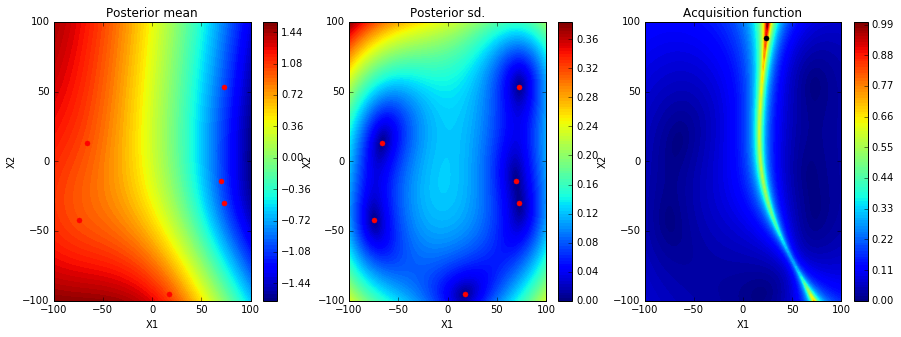

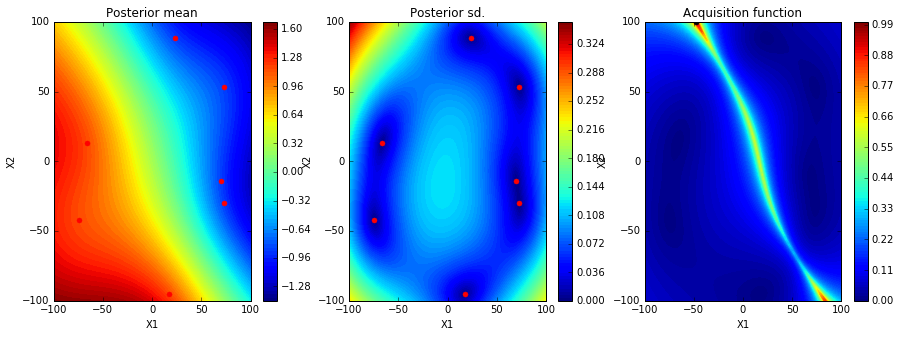

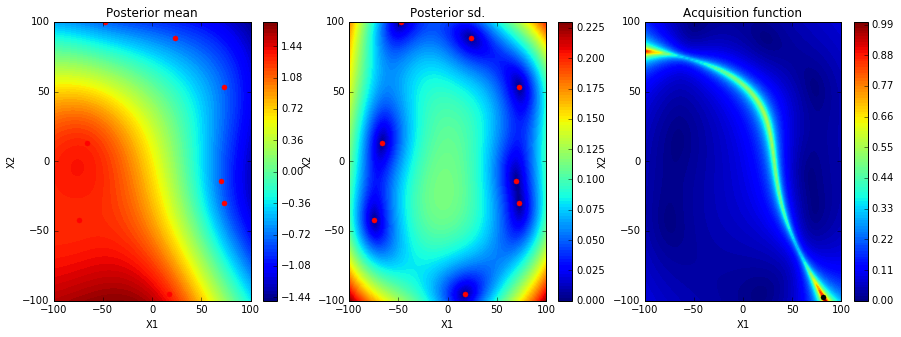

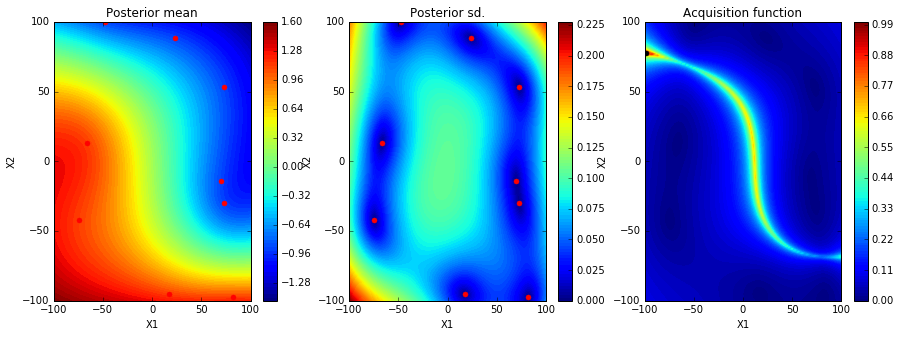

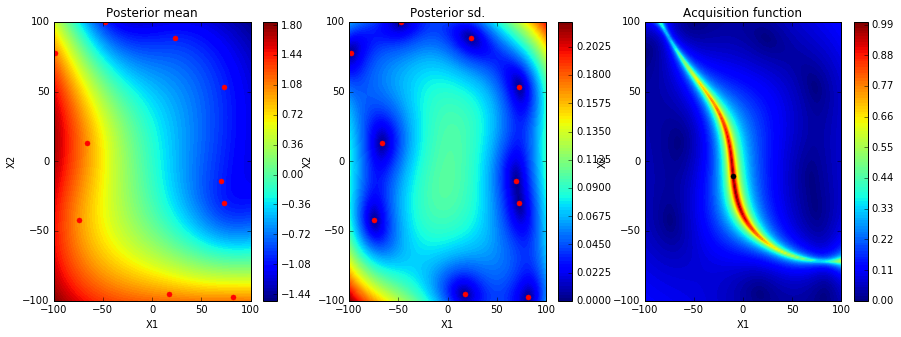

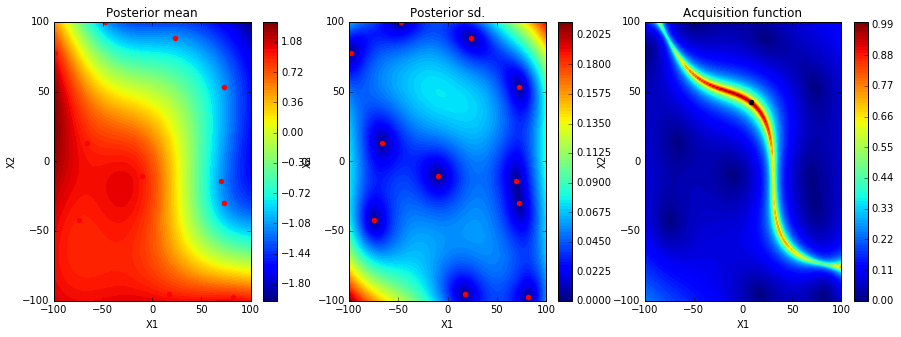

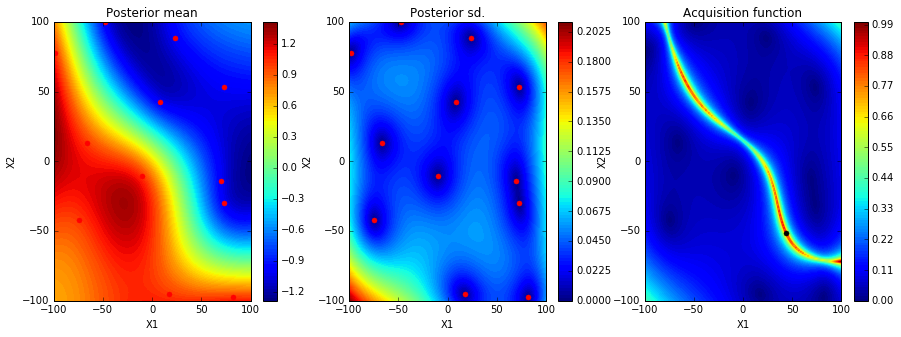

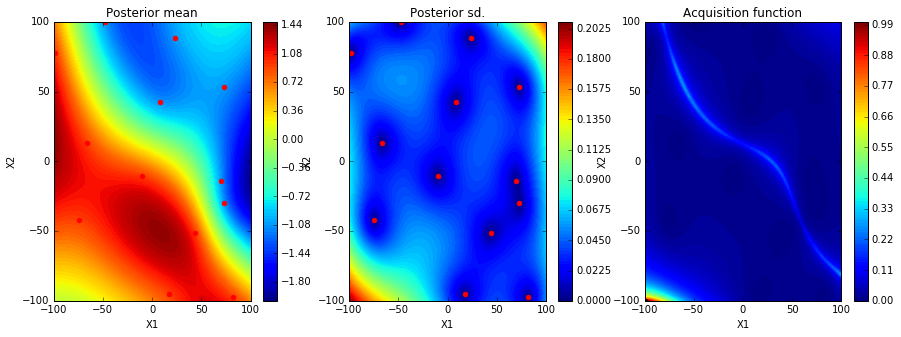

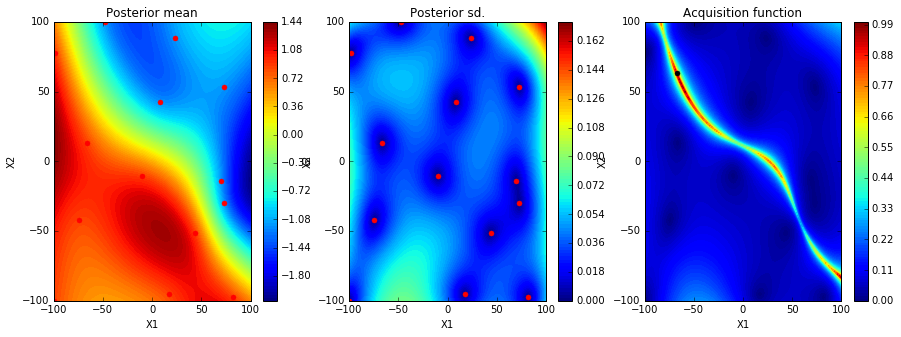

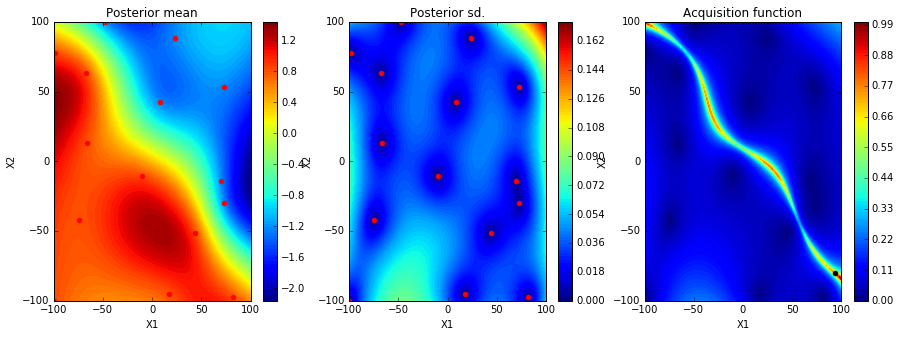

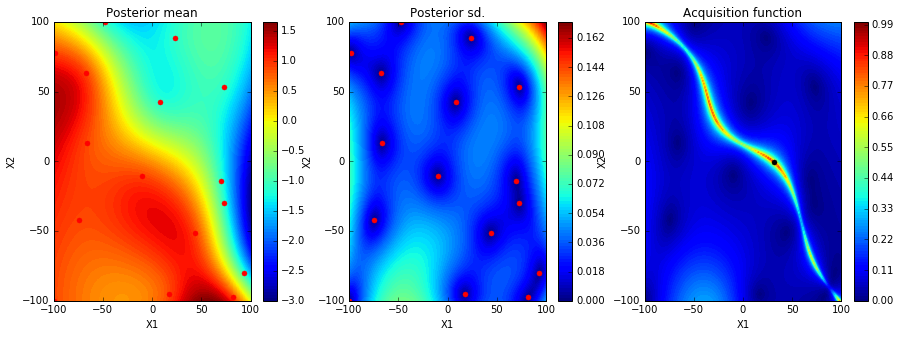

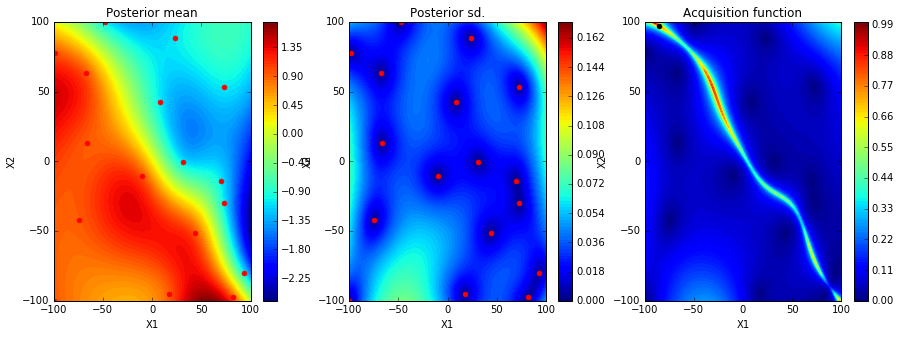

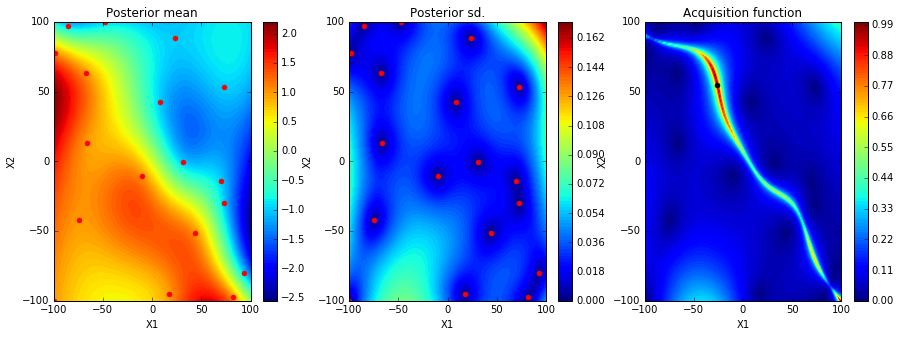

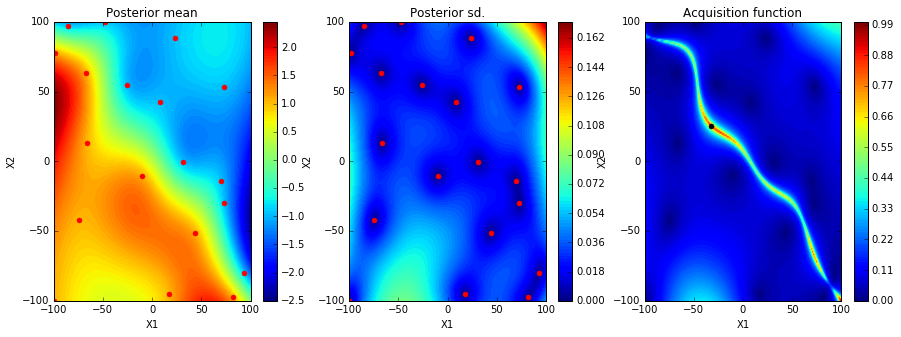

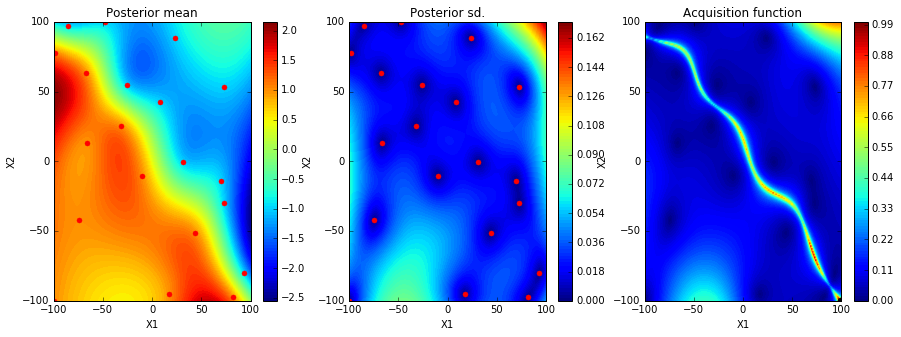

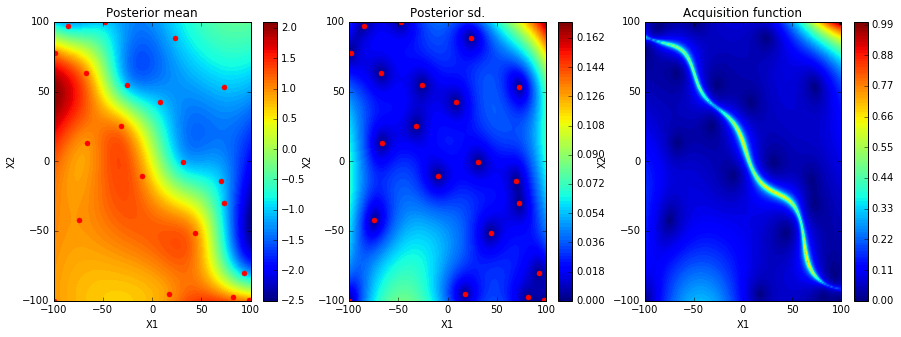

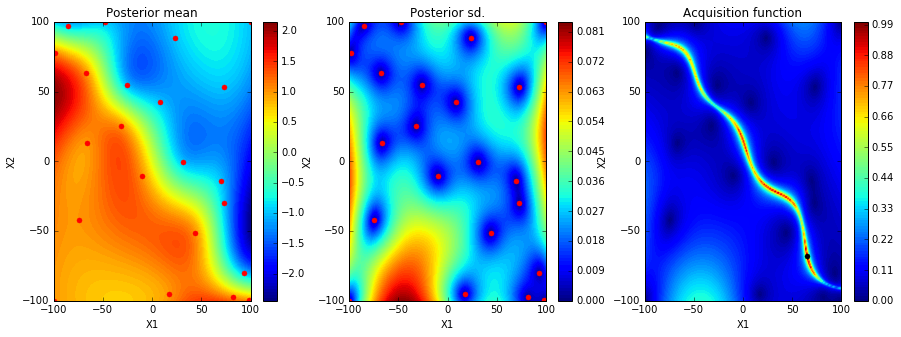

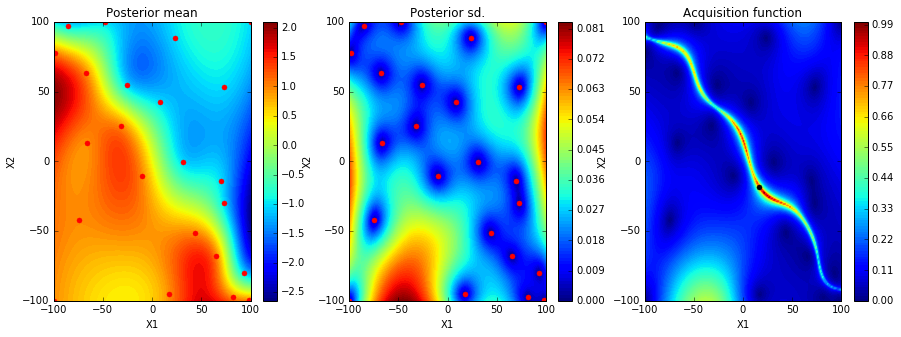

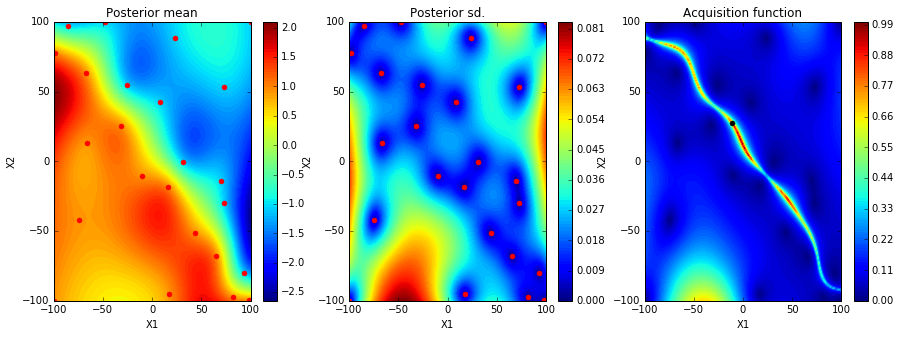

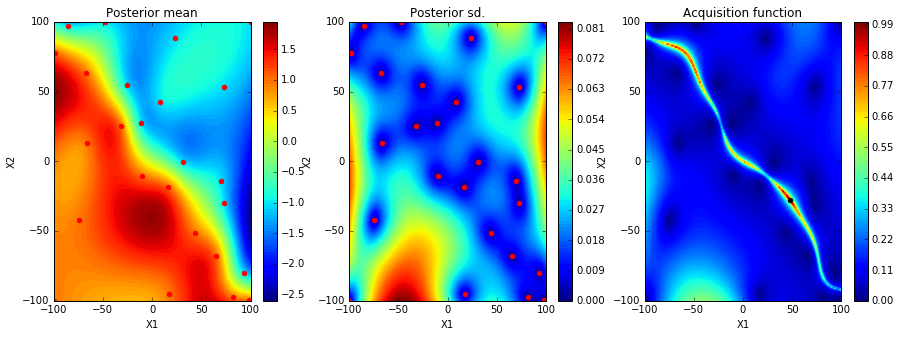

In [113]:
from IPython.display import clear_output

for i in tqdm(range(max_iter)):
    myProblem.run_optimization(max_iter=1) 
    myProblem.plot_acquisition()

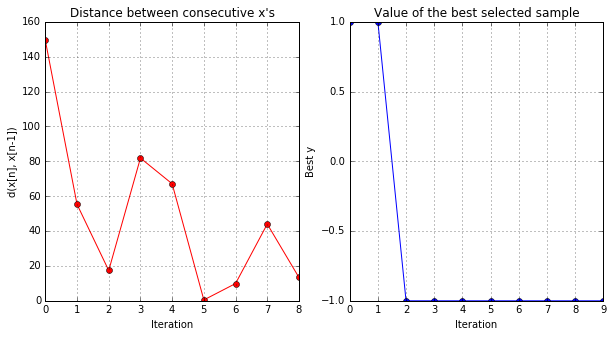

In [108]:
myProblem.plot_convergence()